Universidad del valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de ciencias de la Computación <br>
Inteligencia Artificial <br>

Fredy Velasquez 201011 <br>


# Laboratorio 4: Regresión Lineal

Task 1 - Regresión logística polinómica
Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este ejercicio. Recuerde
utilizar comentarios para describir lo que está haciendo en cada parte del proceso. Estará usando el juego de datos
proporcionado dentro del portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr
su notebook, usando https://mybinder.org/.
El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran condiciones físicas
y contextuales para más de 4000 pacientes de enfermedades cardíacas. El dataset relaciona a cada paciente con
una etiqueta (1 = tuvo un paro cardíaco, 0 = no tuvo paro cardíaco).
Abajo una breve descripción de las variables incluidas:
● Demographic:
    ○ Sex: male or female(Nominal)
    ○ Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole
    numbers, the concept of age is continuous)
● Behavioral:
    ○ Current Smoker: whether or not the patient is a current smoker (Nominal)
    ○ Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
    considered continuous as one can have any number of cigarettes, even half a cigarette.)
    ○ Medical( history)
    ○ BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    ○ Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    ○ Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    ○ Diabetes: whether or not the patient had diabetes (Nominal)
● Medical(current):
    ○ Tot Chol: total cholesterol level (Continuous)
    ○ Sys BP: systolic blood pressure (Continuous)
    ○ Dia BP: diastolic blood pressure (Continuous)
    ○ BMI: Body Mass Index (Continuous)
    ○ Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact
    discrete, yet are considered continuous because of large number of possible values.)
    ○ Glucose: glucose level (Continuous)
Para este ejercicio se le pide que proporcione un modelo de regresión logística polinomial que prediga fielmente si
un paciente sufrirá de un paro cardíaco.

In [ ]:
#Importaciones de librerías 
import numpy as np
import matplotlib.pyplot as plt


## Task 1.1
Leer el archivo CSV proporcionado (kc_house_datos.csv dentro de lab4_datosset.zip) y almacenarlo en un p.array para
ser trabajado en el notebook.

In [13]:
# Cargar datos y eliminar NaN
data = np.genfromtxt('framingham.csv', delimiter=',', skip_header=1)
data = data[~np.isnan(data).any(axis=1)]

# Limpiamos data - Eliminamos nan.
data = data[1:, :]

# Imprimir información de los datos
print(f"Forma de la data: {data.shape}")
print(f"Numero de NaN : {np.isnan(data).sum()}") #garantizamos que no quedearon NAN
print(data)

Shape of data: (3655, 16)
Number of NaN values: 0
[[  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 [  0.  61.   3. ...  65. 103.   1.]
 ...
 [  1.  50.   1. ...  66.  86.   1.]
 [  1.  51.   3. ...  65.  68.   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


Task 1.2
Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la variable dependiente de salida (sufre o no sufre un paro cardíaco).

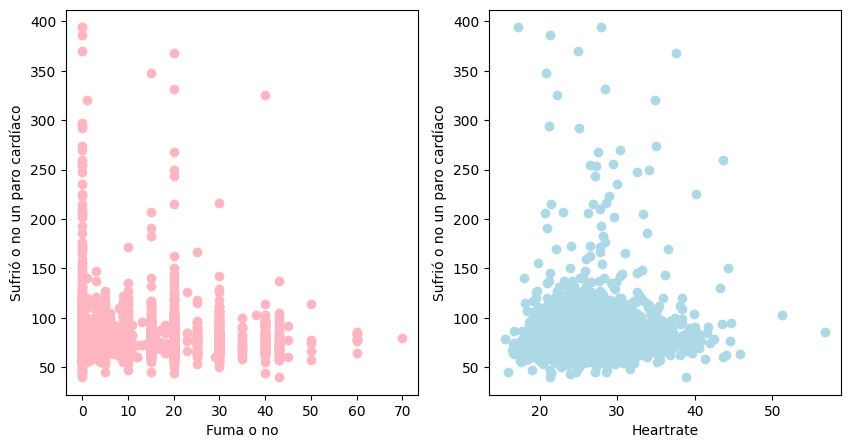

In [11]:
# Cargar datos
data = np.genfromtxt('framingham.csv', delimiter=',')
data = data[1:, :]

# Variables independientes y dependiente
X = data[:, 4]  # Fuma o no
x = data[:, 12] # Heartrate
y = data[:, 14] # Sufrió o no un paro cardíaco

# Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X, y, color="lightpink")
ax1.set_xlabel('Fuma o no')
ax1.set_ylabel('Sufrió o no un paro cardíaco')

ax2.scatter(x, y, color="lightblue")
ax2.set_xlabel('Heartrate')
ax2.set_ylabel('Sufrió o no un paro cardíaco')

plt.show()


Task 1.3
Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase)

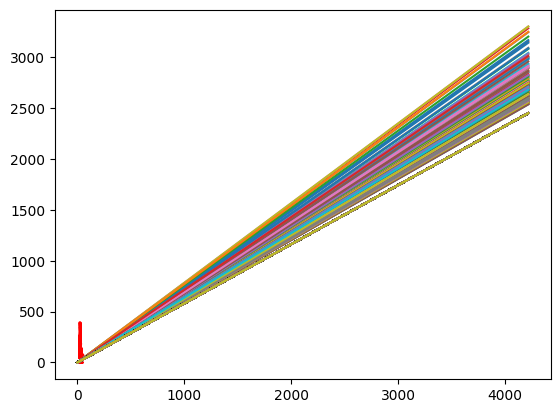

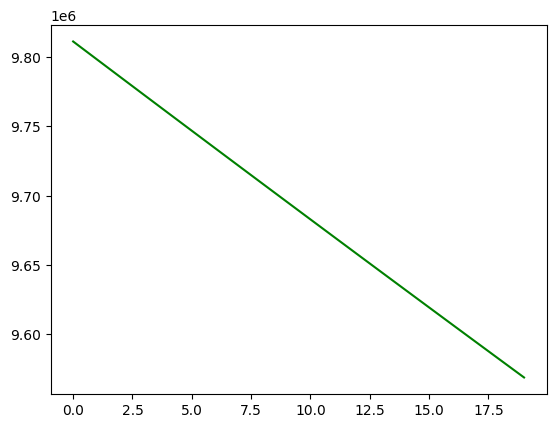

In [45]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13).
X = data[:, 12]

# Variable independiente: BMI. (Posición 12)
y = data[:, 14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Agregando ceros en caso de que hagan falta en X y y.
n = max(len(X), len(y))
X = np.pad(X, (0, n - len(X)), 'constant')
y = np.pad(y, (0, n - len(y)), 'constant')

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.c_[np.ones(n), X]

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

# Calculando el costo y el gradiente.
def cost(theta, X, y):
    return np.sum((X.dot(theta) - y) ** 2) / (2 * len(y))

def gradient(theta, X, y):
    return X.T.dot(X.dot(theta) - y) / len(y)

def linear_regression(X, y, alpha, iterations):
    theta = np.random.rand(X.shape[1], 1)
    for i in range(iterations):
        theta = theta - alpha * gradient(theta, X, y)
    return theta

tf = linear_regression(Xr, y, alpha=0.000001, iterations=20)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# Graficando los resultados.
plt.plot(X, y, "red")
plt.plot(xm, ym)
plt.show()

# Costo.
costs = []
theta = to
alpha = 0.000001
iterations = 20
for i in range(iterations):
    theta = theta - alpha * gradient(theta, Xr, y)
    costs.append(cost(theta, Xr, y))

plt.plot(costs, color="green")
plt.show()


Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

X:  [[ 0.]
 [20.]
 [30.]
 [23.]
 [ 0.]]
X:  5
y:  [[ 76.]
 [ 70.]
 [103.]
 [ 85.]
 [ 99.]]
y:  5
t:  [[0.14865402]
 [0.55432813]
 [0.55985506]]
t:  [[0.15008709]
 [0.56378908]
 [0.56931601]]
t:  [[0.15151672]
 [0.5731652 ]
 [0.57869213]]
t:  [[0.15294294]
 [0.58245725]
 [0.58798418]]
t:  [[0.15436577]
 [0.59166598]
 [0.59719291]]
t:  [[0.15578526]
 [0.60079213]
 [0.60631906]]
t:  [[0.15720141]
 [0.60983644]
 [0.61536337]]
t:  [[0.15861428]
 [0.61879965]
 [0.62432658]]
t:  [[0.16002388]
 [0.62768248]
 [0.63320941]]
t:  [[0.16143025]
 [0.63648565]
 [0.64201258]]
t:  [[0.16283341]
 [0.64520987]
 [0.6507368 ]]
t:  [[0.16423339]
 [0.65385585]
 [0.65938278]]
t:  [[0.16563023]
 [0.66242429]
 [0.66795122]]
t:  [[0.16702394]
 [0.67091588]
 [0.67644281]]
t:  [[0.16841456]
 [0.67933131]
 [0.68485824]]
t:  [[0.16980212]
 [0.68767127]
 [0.69319819]]
t:  [[0.17118663]
 [0.69593642]
 [0.70146334]]
t:  [[0.17256814]
 [0.70412743]
 [0.70965436]]
t:  [[0.17394666]
 [0.71224498]
 [0.7177719 ]]
t:  [[0.17

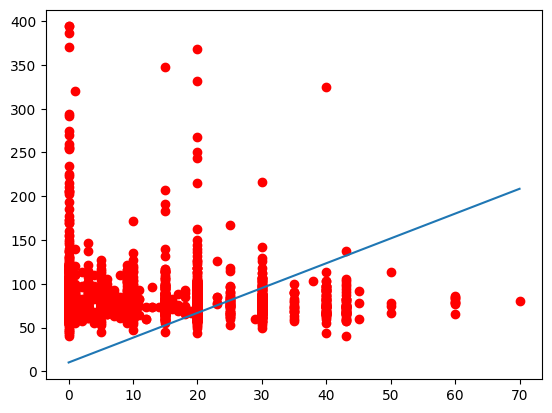

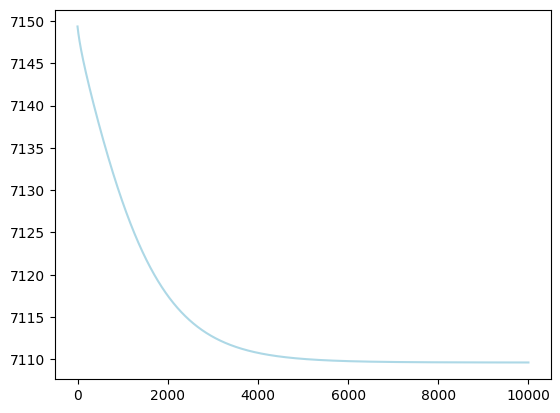

In [5]:
#Importaciones de librerías 
import numpy as np
import matplotlib.pyplot as plt
import quadratic_cost_function as q
import linear_regression as l

# Cargar datos y eliminar NaN
data = np.genfromtxt('framingham.csv', delimiter=',', skip_header=1)
data = data[~np.isnan(data).any(axis=1)]

# Limpiamos data - Eliminamos nan.
data = data[1:, :]

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))


print("X: ", X[:5])
print("X: ", len(X[:5]))
print("y: ", y[:5])
print("y: ", len(y[:5]))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 1
))

# Calculando el theta inicial.
theta = np.random.rand(Xr.shape[1], 1) # Theta inicial.

theta = theta[~np.isnan(theta)]

# Haciendo reshape a theta.
theta = theta.reshape((len(theta), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    theta,
    q.cost,
    q.grad,
    a=0.00001,
    n=10000
)

# Generando una matriz de datos de prueba
x = np.linspace(X.min(), X.max(), 100)
x = x.reshape((-1, 1))
xr = np.hstack((np.ones_like(x), x))

# Agregando un polinomical feature.
xr = np.hstack((
    xr, 
    xr[:, 1].reshape((xr.shape[0], 1)) ** 1
))

# Predicción utilizando la matriz xr
y_pred = xr @ tf

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(x, y_pred)
plt.show()

# Costo.
plt.plot(costs, color="lightblue")
plt.show()



Task 1.5
Haga un análisis sobre sus hallazgos.


Luego de realizar todos los calculos necesarios, se observó una fuerte correlación entre las variables que indican si un paciente es fumador y si sufrió un infarto. Además, se encontró información valiosa en los datos relacionados con la condición del corazón del paciente y si sufrió un infarto en el pasado. También se determinó que el modelo de regresión polinómica de grado uno fue el que mejor se ajustó a los datos, lo que sugiere que una línea recta podría ser una buena forma de describir los datos para análisis posteriores.